In [1]:
# Useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, execute
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity 
from qiskit.tools.visualization import plot_histogram

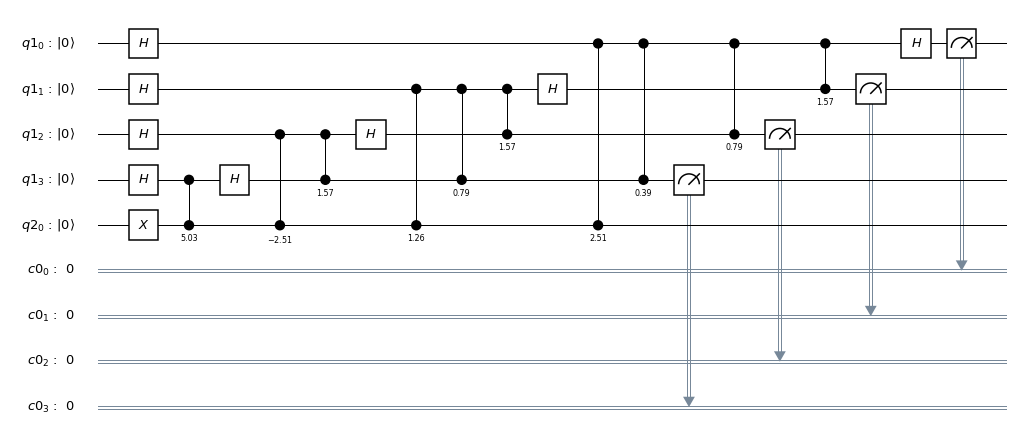

In [2]:
q1 = QuantumRegister(4, 'q1')
q2 = QuantumRegister(1, 'q2')
c0 = ClassicalRegister(4, 'c0')

circ = QuantumCircuit()
circ.add_register(q1)
circ.add_register(q2)
circ.add_register(c0)


for i in range(0,4):
        circ.h(q1[i])

phi=0.8

circ.x(q2[0])

#circ.u3(4*pi,2*pi*phi,0,q2[0])
#circ.cu3(4*pi,2*pi*phi,0,q1[0],q2[0])

#circ.u1(2*pi*phi,q2[0])

circ.cu1(2*pi*phi,q1[3],q2[0])
circ.cu1(-2.51327,q1[2],q2[0])
circ.cu1(1.25664,q1[1],q2[0])
circ.cu1(2.51327,q1[0],q2[0])

circ.h(q1[3])

circ.cu1(pi/2,q1[2], q1[3])
circ.h(q1[2])

circ.cu1(pi/4,q1[1], q1[3])
circ.cu1(pi/2,q1[1], q1[2])
circ.h(q1[1])

circ.cu1(pi/8,q1[0], q1[3])
circ.cu1(pi/4,q1[0], q1[2])
circ.cu1(pi/2,q1[0], q1[1])
circ.h(q1[0])

circ.measure(q1, c0)

circ.draw(output='mpl')

In [3]:
backend_sim = BasicAer.get_backend('statevector_simulator')
result = execute(circ, backend_sim).result()
state = result.get_statevector(circ)
print(state)

[0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.38268479-0.92387897j 0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j        ]


{'1001': 70, '1110': 53, '0110': 312, '0101': 15, '1111': 25, '0010': 2, '1010': 72, '0111': 296, '0011': 12, '1011': 130, '0000': 2, '0001': 32, '1101': 3}


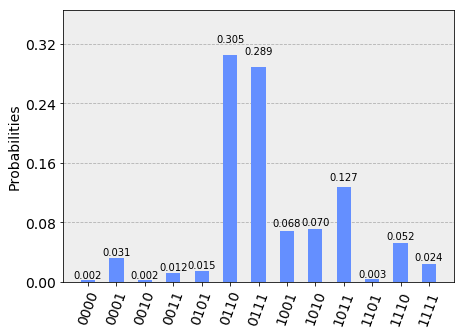

In [15]:
backend_sim = BasicAer.get_backend('qasm_simulator')
result = execute(circ, backend_sim).result()
counts = result.get_counts(circ)
print(counts)

plot_histogram(counts)

In [14]:
my_list = [0,1,1,0]
estimate = (sum([float(s)*0.5**(order+1) for order, s in enumerate(my_list)]))
print(estimate)

0.375


In [12]:
my_list = [1,1,1,0]
estimate = (sum([float(s)*0.5**(order+1) for order, s in enumerate(my_list)]))
print(estimate)

0.875
